#Importação de Bibliotecas e Base

In [ ]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importando os dados
  #Dados do Enem
enem2020 = pd.read_csv(f"MICRODADOS_ENEM_2020.csv", sep = ";", encoding = "latin1")

#Analise Exploratória

In [ ]:
#Visulizando as 5 primeiras linhas
enem2020.head(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


In [ ]:
#Quantidade de linhas e colunas na tabela + Nome das colunas
print(f"Linhas presentes na tabela: {enem2020.shape[0]}")
print(f"Qtd de Colunas presentes na tabela: {enem2020.shape[1]}")
print(f"Nome das Colunas: {enem2020.columns.values}")

Linhas presentes na tabela: 253580
Qtd de Colunas presentes na tabela: 76
Nome das Colunas: ['NU_INSCRICAO' 'NU_ANO' 'TP_FAIXA_ETARIA' 'TP_SEXO' 'TP_ESTADO_CIVIL'
 'TP_COR_RACA' 'TP_NACIONALIDADE' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU'
 'TP_ESCOLA' 'TP_ENSINO' 'IN_TREINEIRO' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'CO_MUNICIPIO_PROVA'
 'NO_MUNICIPIO_PROVA' 'CO_UF_PROVA' 'SG_UF_PROVA' 'TP_PRESENCA_CN'
 'TP_PRESENCA_CH' 'TP_PRESENCA_LC' 'TP_PRESENCA_MT' 'CO_PROVA_CN'
 'CO_PROVA_CH' 'CO_PROVA_LC' 'CO_PROVA_MT' 'NU_NOTA_CN' 'NU_NOTA_CH'
 'NU_NOTA_LC' 'NU_NOTA_MT' 'TX_RESPOSTAS_CN' 'TX_RESPOSTAS_CH'
 'TX_RESPOSTAS_LC' 'TX_RESPOSTAS_MT' 'TP_LINGUA' 'TX_GABARITO_CN'
 'TX_GABARITO_CH' 'TX_GABARITO_LC' 'TX_GABARITO_MT' 'TP_STATUS_REDACAO'
 'NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5' 'NU_NOTA_REDACAO' 'Q001' 'Q002' 'Q003' 'Q004' 'Q005'
 'Q006' 'Q007' 'Q008' 'Q009' 'Q010' 'Q01

In [ ]:
#Verificar dados nulos
enem2020.isna().sum().sort_values(ascending=False).head(30)

,0
TP_LOCALIZACAO_ESC,197480
CO_UF_ESC,197480
TP_SIT_FUNC_ESC,197480
TP_DEPENDENCIA_ADM_ESC,197480
SG_UF_ESC,197480
CO_MUNICIPIO_ESC,197480
NO_MUNICIPIO_ESC,197480
TP_ENSINO,163362
NU_NOTA_CN,96219
CO_PROVA_MT,96219


#Separando os DataFrames e Tratando

In [ ]:
#separando DFs
notas = enem2020[["NU_INSCRICAO", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC",
                "NU_NOTA_MT", "NU_NOTA_REDACAO", "TP_PRESENCA_CN", "TP_PRESENCA_LC"]].copy()

info_aluno = enem2020[["NU_INSCRICAO", "TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA",
                     "TP_ST_CONCLUSAO", "TP_ESCOLA", "IN_TREINEIRO", "CO_MUNICIPIO_ESC",
                     "NO_MUNICIPIO_ESC", "SG_UF_ESC", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC"]].copy()

info_renda = enem2020[["NU_INSCRICAO", "Q006", "Q008", "Q024", "Q025"]]

In [ ]:
#Criando dicionario
faixa_etaria = {1: "Menor de 17 anos", 2: "17 anos", 3: "18 anos", 4: "19 anos", 5: "20 anos", 6: "21 anos", 7: "22 anos", 8: "23 anos", 9: "24 anos", 10: "25 anos", 11: "Entre 26 e 30 anos", 12: "Entre 31 e 35 anos", 13: "Entre 36 e 40 anos", 14: "Entre 41 e 45 anos", 15: "Entre 46 e 50 anos", 16: "Entre 51 e 55 anos", 17: "Entre 56 e 60 anos", 18: "Entre 61 e 65 anos", 19: "Entre 66 e 70 anos", 20: "Maior de 70 anos"}
raca_cor = {0: "Não declarado", 1: "Branca", 2: "Preta", 3: "Parda", 4: "Amarela", 5: "Indígena"}
situacao_ensino_medio = {1: "Concluiu", 2: "Ira ser concluido em 2020", 3: "Ira ser concluido depois 2020", 4: "Não concluí e não estou cursando o Ensino Médio"}
tipo_escola = {1: "Não Respondeu", 2: "Pública", 3: "Privada", 4: "Exterior"}
resposta_binaria = {1: "Sim", 0: "Não"}
tipo_gestao = {1: "Federal", 2: "Estadual", 3: "Municipal", 4: "Privada"}
localizacao = {1: "Urbana", 2: "Rural"}



# Mapeando as colunas usando o dicionário
info_aluno['TP_FAIXA_ETARIA'] = info_aluno['TP_FAIXA_ETARIA'].map(faixa_etaria)
info_aluno['TP_COR_RACA'] = info_aluno['TP_COR_RACA'].map(raca_cor)
info_aluno['TP_ST_CONCLUSAO'] = info_aluno['TP_ST_CONCLUSAO'].map(situacao_ensino_medio)
info_aluno['TP_ESCOLA'] = info_aluno['TP_ESCOLA'].map(tipo_escola)
info_aluno['IN_TREINEIRO'] = info_aluno['IN_TREINEIRO'].map(resposta_binaria)
info_aluno['TP_DEPENDENCIA_ADM_ESC'] = info_aluno['TP_DEPENDENCIA_ADM_ESC'].map(tipo_gestao)
info_aluno['TP_LOCALIZACAO_ESC'] = info_aluno['TP_LOCALIZACAO_ESC'].map(localizacao)


In [ ]:
info_aluno.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC
0,200006271946,Entre 26 e 30 anos,F,Preta,Concluiu,Não Respondeu,Não,NaN,NaN,NaN,NaN,NaN
1,200001195856,Entre 26 e 30 anos,M,Parda,Concluiu,Não Respondeu,Não,NaN,NaN,NaN,NaN,NaN
2,200001943954,19 anos,F,Parda,Ira ser concluido em 2020,Pública,Não,2927408.0,Salvador,BA,Estadual,Urbana
3,200001908998,17 anos,M,Parda,Ira ser concluido em 2020,Pública,Não,3547304.0,Santana de Parnaíba,SP,Municipal,Urbana
4,200001634757,19 anos,F,Parda,Concluiu,Não Respondeu,Não,NaN,NaN,NaN,NaN,NaN


In [ ]:
faixa_renda = {
    "A": "Nenhuma Renda",
    "B": "Até R$ 1.045,00",
    "C": "De R$ 1.045,01 até R$ 1.567,50",
    "D": "De R$ 1.567,51 até R$ 2.090,00",
    "E": "De R$ 2.090,01 até R$ 2.612,50",
    "F": "De R$ 2.612,51 até R$ 3.135,00",
    "G": "De R$ 3.135,01 até R$ 4.180,00",
    "H": "De R$ 4.180,01 até R$ 5.225,00",
    "I": "De R$ 5.225,01 até R$ 6.270,00",
    "J": "De R$ 6.270,01 até R$ 7.315,00",
    "K": "De R$ 7.315,01 até R$ 8.360,00",
    "L": "De R$ 8.360,01 até R$ 9.405,00",
    "M": "De R$ 9.405,01 até R$ 10.450,00",
    "N": "De R$ 10.450,01 até R$ 12.540,00",
    "O": "De R$ 12.540,01 até R$ 15.675,00",
    "P": "De R$ 15.675,01 até R$ 20.900,00",
    "Q": "Acima de R$ 20.900,00"
}

quantidade_banheiros = {
    "A": "Não.",
    "B": "Sim, um.",
    "C": "Sim, dois.",
    "D": "Sim, três.",
    "E": "Sim, quatro ou mais."
}


computadores = {
    "A": 0,
    "B": 1,
    "C": 2,
    "D": 3,
    "E": 4
}

internet = {
    "A": "Não",
    "B": "Sim"
    }

# Mapeando as colunas usando o dicionário
info_renda['Q006'] = info_renda['Q006'].map(faixa_renda)
info_renda['Q008'] = info_renda['Q008'].map(quantidade_banheiros)
info_renda['Q024'] = info_renda['Q024'].map(computadores)
info_renda['Q025'] = info_renda['Q025'].map(internet)


#Trocando o nome das colunas
info_renda = info_renda.rename(columns={
    'Q006': 'faixa_renda',
    'Q008': 'qtd_banheiros',
    'Q024': 'qtd_computadores',
    'Q025': 'internet'})

In [ ]:
info_renda.head()

,NU_INSCRICAO,faixa_renda,qtd_banheiros,qtd_computadores,internet
0,200006271946,NaN,NaN,NaN,NaN
1,200001195856,NaN,NaN,NaN,NaN
2,200001943954,"Até R$ 1.045,00","Sim, um.",0.0,Não
3,200001908998,NaN,NaN,NaN,NaN
4,200001634757,"Até R$ 1.045,00","Sim, um.",0.0,Sim


#Perguntas

##1 - Qual escola tem a melhor media de notas ?

In [ ]:
#Criando uma coluna de notas
notas["nota_total"] = notas[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

#
info_aluno_att = pd.merge(info_aluno, notas, on="NU_INSCRICAO")

#Filtrando somente os presentes
info_aluno_presentes = info_aluno_att.loc[(info_aluno_att["TP_PRESENCA_CN"] == "Presente") & (info_aluno_att["TP_PRESENCA_LC"] == "Presente")]

#Agrupando e descobrindo a escola com maior media

escola = info_aluno_presentes.groupby("CO_MUNICIPIO_ESC")["nota_total"].mean()
escola.sort_values(ascending=False).head(10)

,nota_total
CO_MUNICIPIO_ESC,
5004809.0,796.08
3138500.0,766.18
4315107.0,749.76
4216503.0,747.16
5004106.0,740.36
4111704.0,735.36
3107505.0,734.80
4304853.0,733.00
2102200.0,731.58


A escola 5004809.0 é a que tem a maior media nas notas do enem, com uma media de 796,08 !

##2 -Qual o aluno com a maior média de notas e o valor dessa média ?

In [ ]:
#Pegando somente os alunos presentes nos 2 dias de ENEM
notas_presentes = notas.loc[(notas["TP_PRESENCA_CN"] == "Presente") & (notas["TP_PRESENCA_LC"] == "Presente")]
#Calculando a media das notas
notas_aluno = notas_presentes.groupby("NU_INSCRICAO")[["nota_total","NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].mean()
notas_aluno.sort_values(ascending=False, by = "nota_total").head(1)

,nota_total,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,,
200004812135,852.86,805.4,774.3,749.6,975.0,960.0


O aluno com a maior media entre as notas foi o 200004812135, com uma nota média de 852.86


##3- Qual a media geral de notas ?

In [ ]:
# Calculando a média geral das colunas de notas
media_geral = notas_presentes[["NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean().mean()

# Exibindo o resultado
print(f"A média geral de notas é {round(media_geral, 2)}")

A média geral de notas é 551.36


##4 - Qual o % de Ausentes?

In [ ]:
#Filtrando as pessoas que faltaram o Primeiro ou o segundo dia de provas
enem2020_ausentes = notas.loc[(notas["TP_PRESENCA_CN"] == "Ausente") | (notas["TP_PRESENCA_LC"] == "Ausente")]


ausentes = enem2020_ausentes["NU_INSCRICAO"].count()
total = enem2020["NU_INSCRICAO"].count()

perc_ausente = (ausentes/total)*100
print(f"O percentual de ausentes é de {round(perc_ausente,2)}%")

O percentual de ausentes é de 38.03%


##5 - Qual o número total de Inscritos?

In [ ]:
print(f"O numero total de inscritos é {enem2020['NU_INSCRICAO'].count()}")

O numero total de inscritos é 253580


##6 - Qual a média por disciplina?

In [ ]:
# Calculando a média das colunas de notas
media_notas = notas_presentes[["NU_NOTA_CH","NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean()

# Ordenando as médias em ordem decrescente
media_ordenada = media_notas.sort_values(ascending=False)

# Exibindo o resultado
print(media_ordenada)

NU_NOTA_REDACAO    639.785301
NU_NOTA_LC         535.445478
NU_NOTA_MT         531.131705
NU_NOTA_CH         528.612294
NU_NOTA_CN         499.078811
dtype: float64


##7 - Qual a média por Sexo?

In [ ]:
#Aplicando o groupby para o Sexo
sexo_Nota = info_aluno_presentes.groupby("TP_SEXO")[["nota_total","NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].mean()
#Ordenando pela maior nota
sexo_Nota.sort_values(ascending=False, by ="nota_total").round(2)

,nota_total,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_SEXO,,,,,,
M,555.44,542.62,515.60,537.93,562.05,619.01
F,542.63,521.83,491.08,534.24,516.17,649.84


##8 - Qual a média por Etnia?

In [ ]:
#Aplicando o groupby por Etnia
sexo_Nota = info_aluno_presentes.groupby("TP_COR_RACA")[["nota_total","NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].mean()
#Ordenando pela maior nota
sexo_Nota.sort_values(ascending=False, by ="nota_total").round(2)

,nota_total,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_COR_RACA,,,,,,
Branca,579.31,557.91,524.61,557.68,571.57,684.76
Não declarado,547.12,534.16,502.87,534.65,534.73,629.20
Amarela,536.91,516.81,492.91,527.00,522.90,624.91
Parda,528.02,511.01,484.13,521.77,508.01,615.15
Preta,519.10,505.80,477.02,520.12,493.85,598.73
Indígena,489.95,479.54,457.28,496.32,471.39,545.24


#Analises e Gráficos

In [ ]:
# Calculando o percentual de cada faixa etária
percentual_faixa_etaria = info_aluno_presentes["TP_FAIXA_ETARIA"].value_counts(normalize=True) * 100

# Exibindo o resultado formatado
print(percentual_faixa_etaria.round(2))

TP_FAIXA_ETARIA
18 anos               26.57
17 anos               25.76
19 anos               12.93
20 anos                7.19
Menor de 17 anos       5.54
21 anos                4.40
Entre 26 e 30 anos     3.89
22 anos                2.85
Entre 31 e 35 anos     2.15
23 anos                2.13
24 anos                1.71
Entre 36 e 40 anos     1.53
25 anos                1.39
Entre 41 e 45 anos     0.94
Entre 46 e 50 anos     0.52
Entre 51 e 55 anos     0.29
Entre 56 e 60 anos     0.14
Entre 61 e 65 anos     0.05
Entre 66 e 70 anos     0.01
Maior de 70 anos       0.00
Name: proportion, dtype: float64


##Comparação entre resultados por Materia

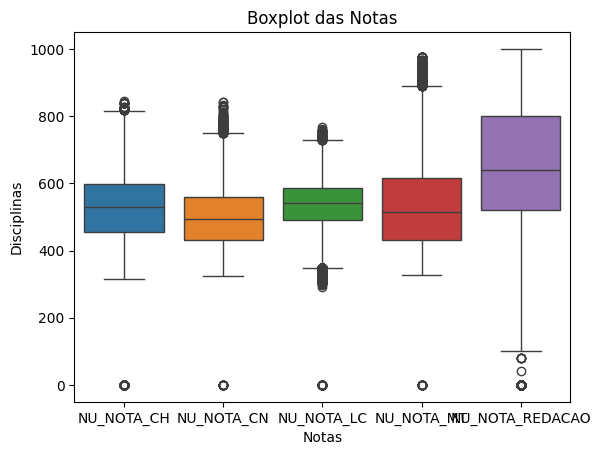

In [ ]:
sns.boxplot(data=info_aluno_presentes[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]])

# Adicionando título e rótulos
plt.title("Boxplot das Notas")
plt.xlabel("Notas")
plt.ylabel("Disciplinas")

# Exibindo o gráfico
plt.show()

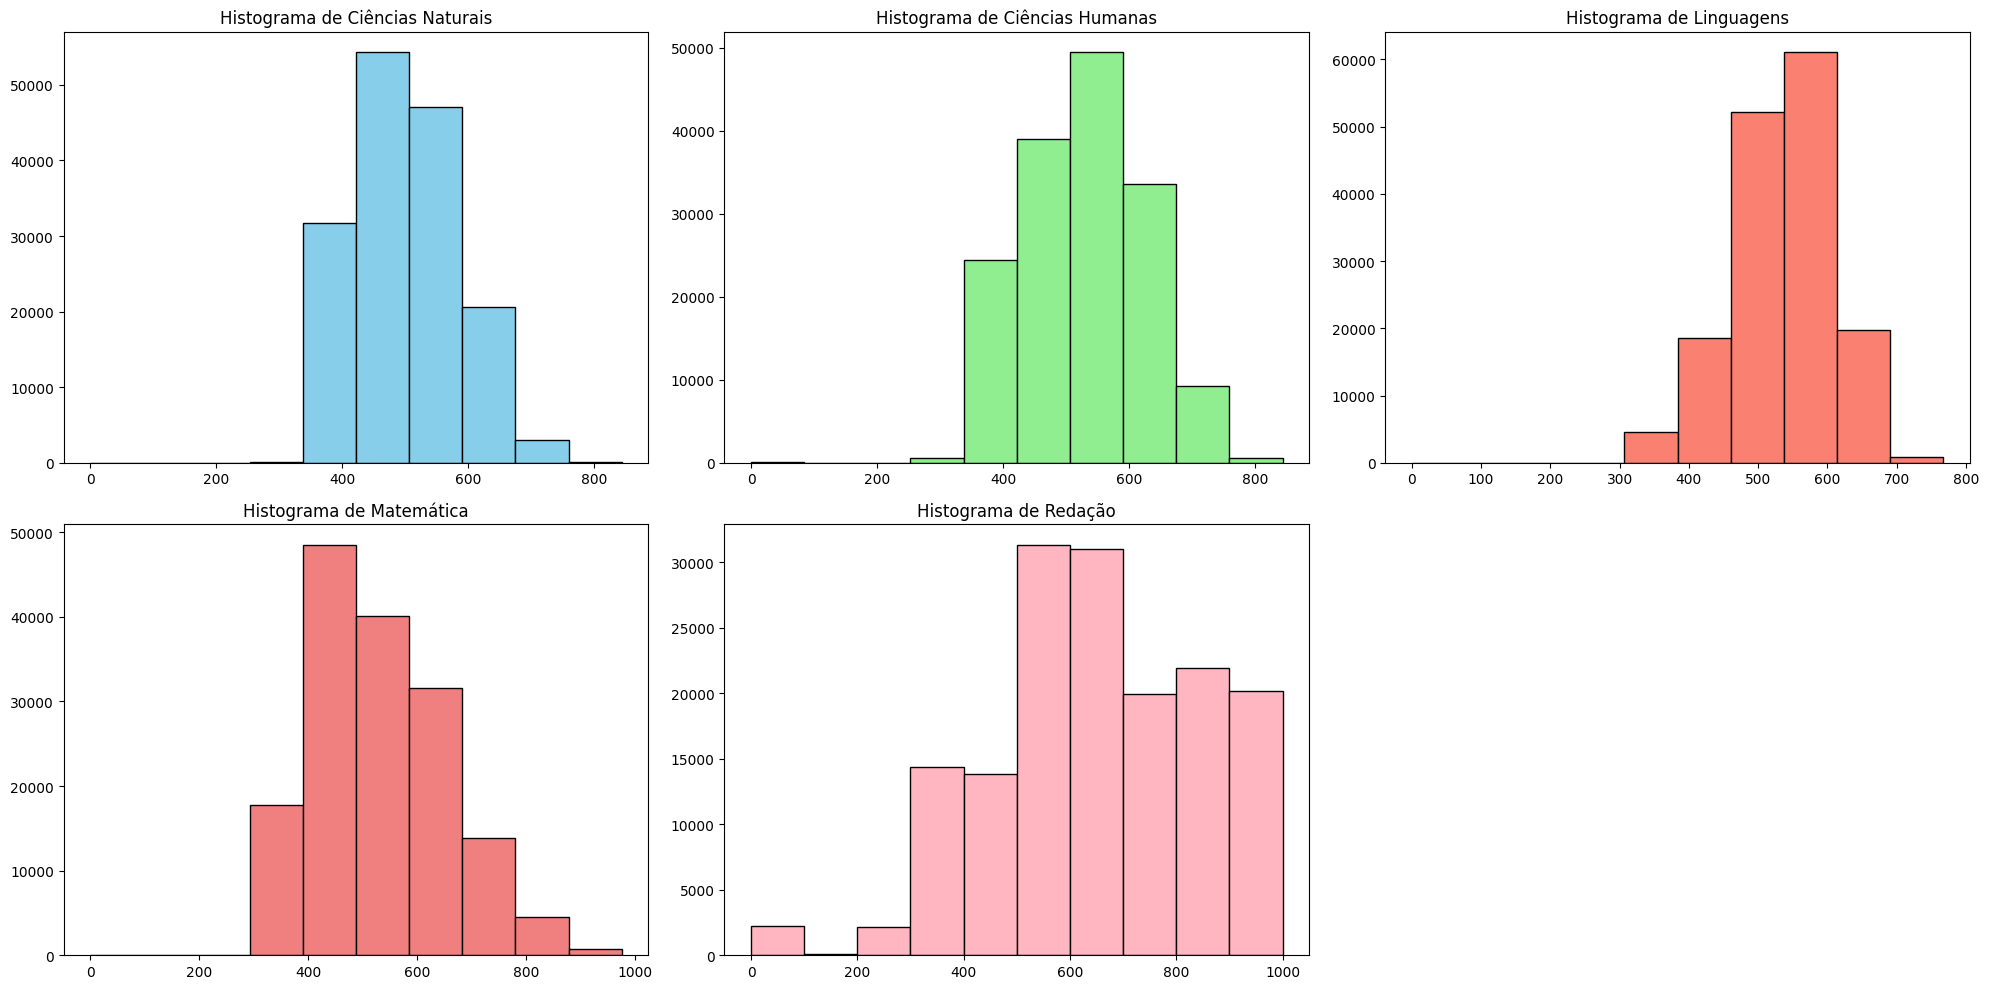

In [ ]:

plt.figure(figsize=(20, 10))

# Histograma para NU_NOTA_CN
plt.subplot(2, 3, 1)
plt.hist(info_aluno_presentes['NU_NOTA_CN'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Ciências Naturais')

# Histograma para NU_NOTA_CH
plt.subplot(2, 3, 2)
plt.hist(info_aluno_presentes['NU_NOTA_CH'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histograma de Ciências Humanas')

# Histograma para NU_NOTA_LC
plt.subplot(2, 3, 3)
plt.hist(info_aluno_presentes['NU_NOTA_LC'], bins=10, color='salmon', edgecolor='black')
plt.title('Histograma de Linguagens')

# Histograma para NU_NOTA_MT
plt.subplot(2, 3, 4)
plt.hist(info_aluno_presentes['NU_NOTA_MT'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Histograma de Matemática')

# Histograma para NU_NOTA_REDACAO
plt.subplot(2, 3, 5)
plt.hist(info_aluno_presentes['NU_NOTA_REDACAO'], bins=10, color='lightpink', edgecolor='black')
plt.title('Histograma de Redação')

# Ajustando o layout para garantir que todos os gráficos fiquem visíveis
plt.tight_layout()

# Exibindo os gráficos
plt.show()


##Correlação entre as Provas com o Resultado Final

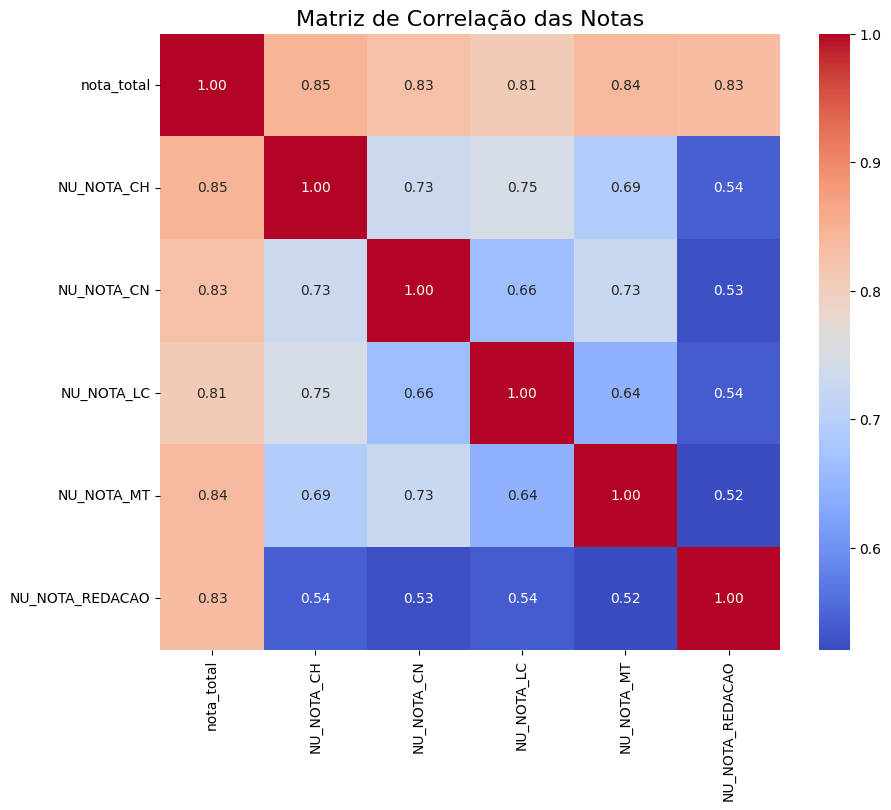

In [ ]:
#Correlação
correlation_matrix = info_aluno_presentes[["nota_total", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].corr()

# Criando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

# Título e exibição do gráfico
plt.title('Matriz de Correlação das Notas', fontsize=16)
plt.show()


Há uma forte correlação entre as notas de Ciências Humanas e a nota final, indicando que quem vai bem nessa área tende a se sair bem em outras.

Alunos com bom desempenho em Linguagens e Códigos também apresentam bons resultados nas demais provas, destacando a importância das habilidades de leitura e interpretação.

##Analises das Provas de Redação

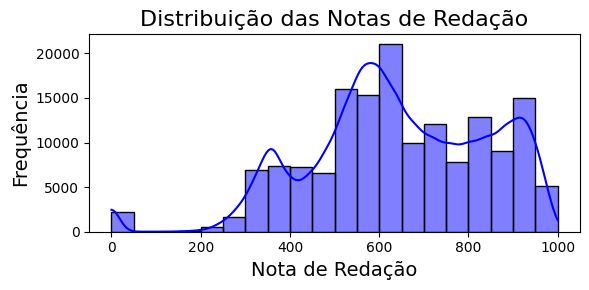

In [ ]:
plt.figure(figsize=(6, 3))

# Histograma de Redação com linha de densidade
sns.histplot(info_aluno_presentes['NU_NOTA_REDACAO'], bins=20, kde=True, color='b', edgecolor='black')

# Título e rótulos
plt.title('Distribuição das Notas de Redação', fontsize=16)
plt.xlabel('Nota de Redação', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


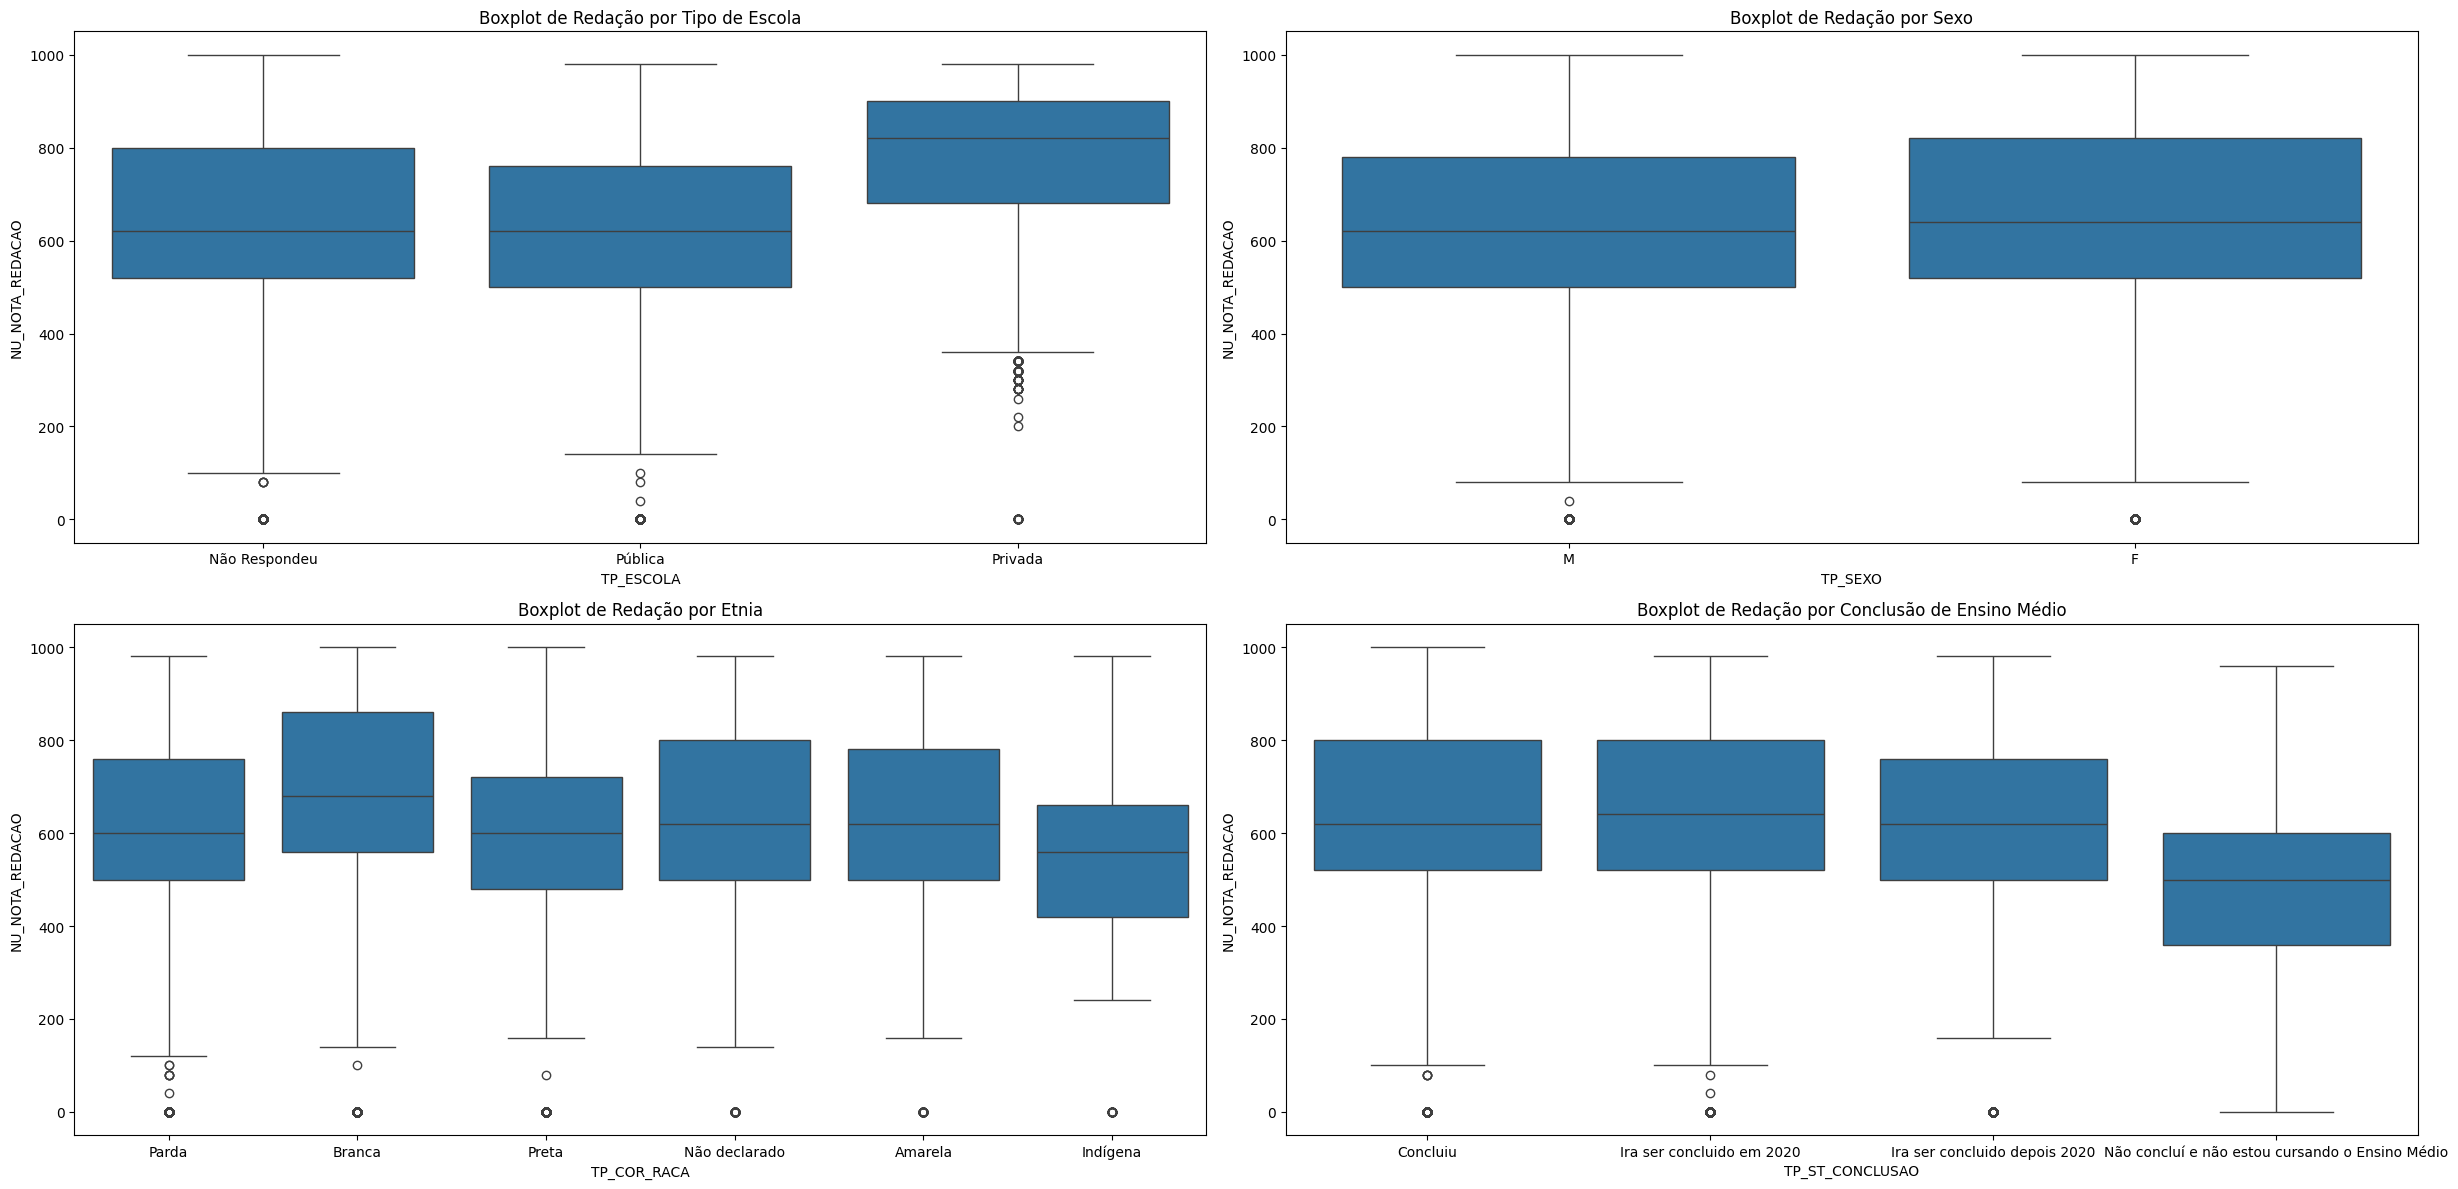

In [ ]:

plt.figure(figsize=(25, 12))

# Boxplot para Tipo de Escola
plt.subplot(2, 2, 1)
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_REDACAO', data=info_aluno_presentes)
plt.title('Boxplot de Redação por Tipo de Escola')

# Boxplot para Sexo
plt.subplot(2, 2, 2)
sns.boxplot(x='TP_SEXO', y='NU_NOTA_REDACAO', data=info_aluno_presentes)
plt.title('Boxplot de Redação por Sexo')

# Boxplot para Etnia
plt.subplot(2, 2, 3)
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_REDACAO', data=info_aluno_presentes)
plt.title('Boxplot de Redação por Etnia')

# Boxplot para Ensino Médio
plt.subplot(2, 2, 4)
sns.boxplot(x='TP_ST_CONCLUSAO', y='NU_NOTA_REDACAO', data=info_aluno_presentes)
plt.title('Boxplot de Redação por Conclusão de Ensino Médio')

# Ajustando o layout para garantir que todos os gráficos fiquem visíveis
plt.tight_layout()

# Exibindo os gráficos
plt.show()


Nesses 4 boxplot podemos concluir que:

-Existe uma diferença significativa nas notas de redação entre alunos de escolas privadas X outros alunos

-Não existe diferença significante entre Notas de redação entre Homem X Mulher

-É possivel identficar uma diferença bem clara nas Etnias sendo Branco com notas mais altas e indigena com as mais baixas

-No ultimo gráfico podemos ver a difereça da nota de quem já concluiu o ensino médio ou está cursando de quem não está cursando

In [ ]:

redacao_idade = info_aluno_presentes.groupby("TP_FAIXA_ETARIA")["NU_NOTA_REDACAO"].mean()
redacao_idade.sort_values(ascending=False)

redacao_idade = info_aluno_presentes.groupby("TP_FAIXA_ETARIA")["NU_NOTA_REDACAO"].mean()
redacao_idade.sort_values(ascending=False)


,NU_NOTA_REDACAO
TP_FAIXA_ETARIA,
17 anos,662.13
19 anos,658.91
18 anos,657.44
20 anos,650.65
21 anos,637.29


##Analises sobre Renda e Resultados

In [ ]:
info_renda_att = pd.merge(info_renda, notas, on="NU_INSCRICAO")
info_renda_presente = info_renda_att.loc[(info_renda_att["TP_PRESENCA_CN"] == "Presente") & (info_renda_att["TP_PRESENCA_LC"] == "Presente")]

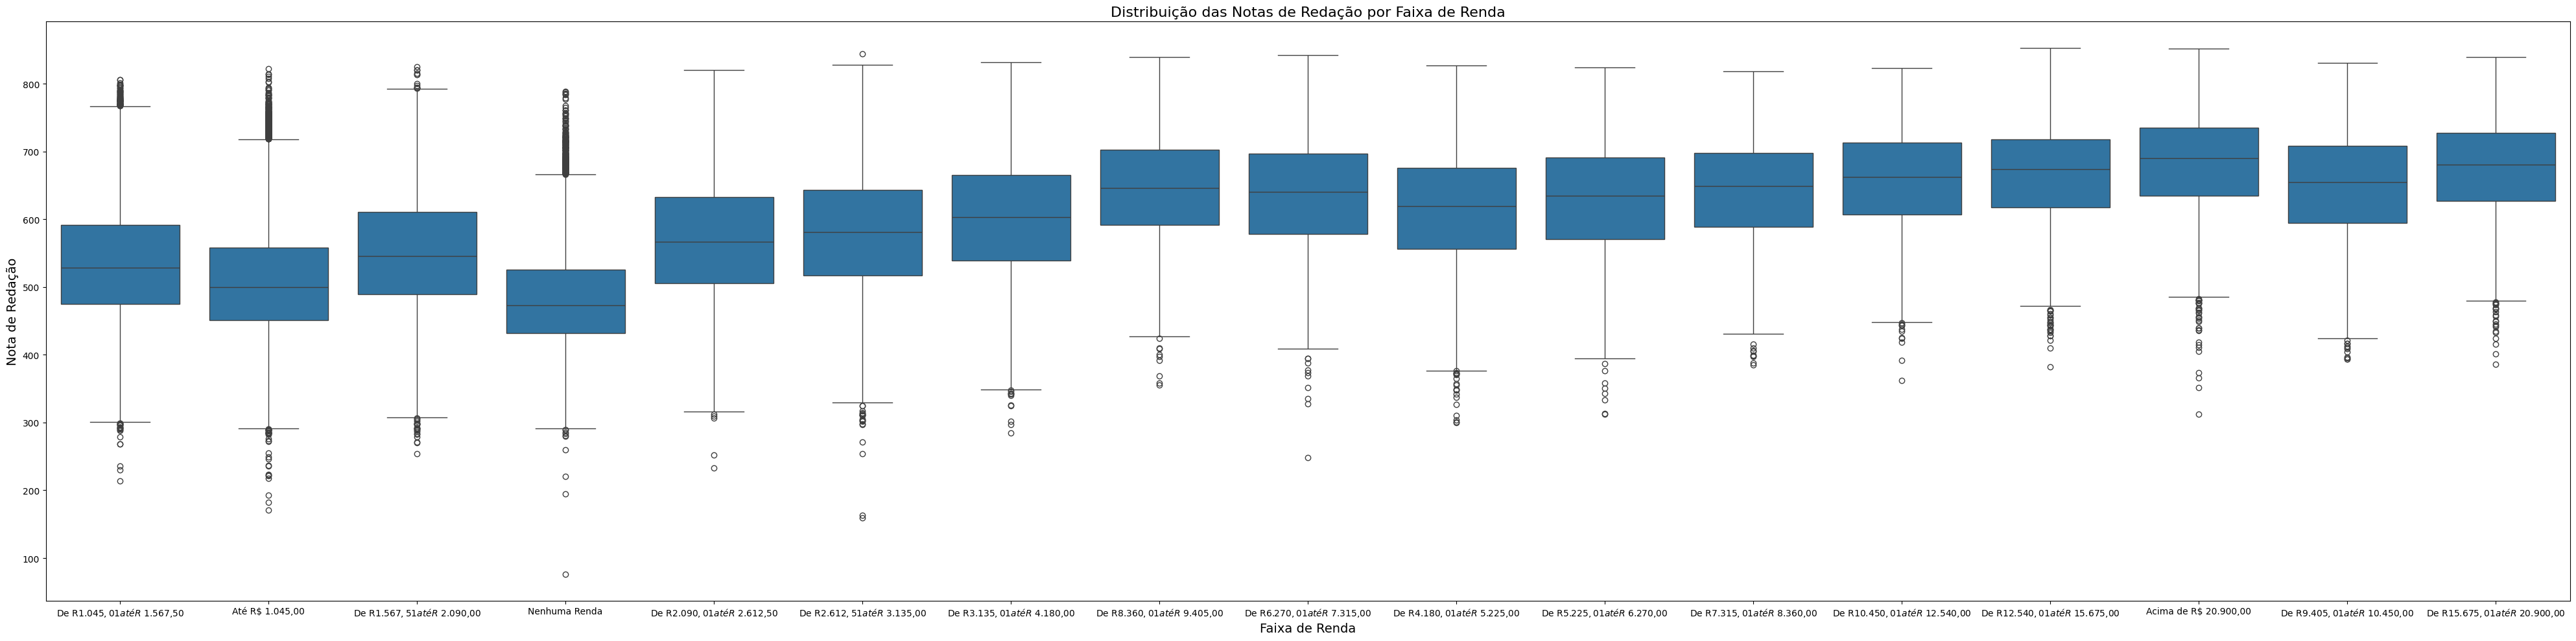

In [ ]:
# Boxplot para comparar a renda com a nota de redação
plt.figure(figsize=(40, 10))
sns.boxplot(x='faixa_renda', y='nota_total', data=info_renda_presente)

# Ajustando título e rótulos
plt.title('Distribuição das Notas de Redação por Faixa de Renda', fontsize=16)
plt.xlabel('Faixa de Renda', fontsize=14)
plt.ylabel('Nota de Redação', fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Podemos identificar que conforme a Renda familiar aumenta a nota final do aluno tambem aumenta !

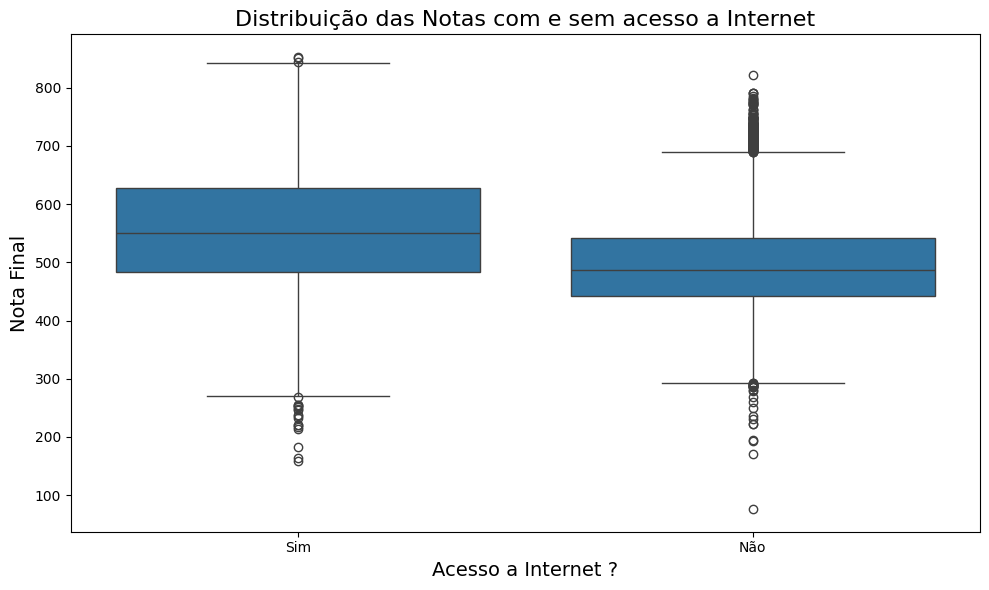

In [ ]:
# Boxplot para comparar a renda com a nota de redação
plt.figure(figsize=(10, 6))
sns.boxplot(x='internet', y='nota_total', data=info_renda_presente)

# Ajustando título e rótulos
plt.title('Distribuição das Notas com e sem acesso a Internet', fontsize=16)
plt.xlabel('Acesso a Internet ?', fontsize=14)
plt.ylabel('Nota Final', fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

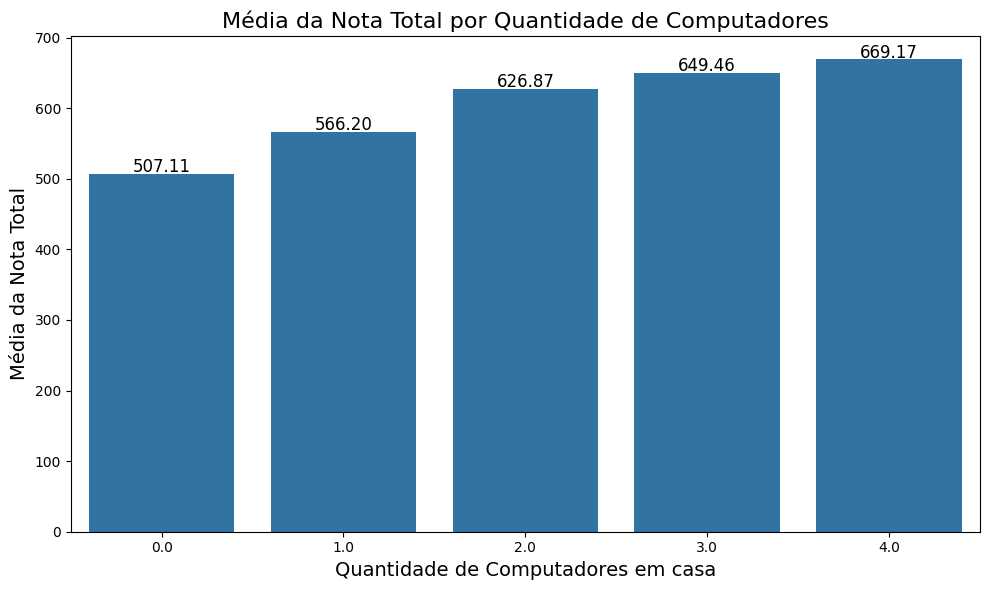

In [ ]:

computadores = info_renda_presente.groupby("qtd_computadores")["nota_total"].mean()

# Ordenar e arredondar os valores
computadores = computadores.sort_values(ascending=False).round(2).head(5)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=computadores.index, y=computadores.values)

# Ajustando título e rótulos
plt.title('Média da Nota Total por Quantidade de Computadores', fontsize=16)
plt.xlabel('Quantidade de Computadores em casa', fontsize=14)
plt.ylabel('Média da Nota Total', fontsize=14)

# Adicionando os rótulos de dados (valores das médias) acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


#Bullets


1 - Em 2020, o ENEM registrou um dos maiores índices de abstenção dos últimos anos, principalmente devido à pandemia de COVID-19. A realização da prova durante a crise, com salas superlotadas e o receio do contágio, fez com que muitos alunos optassem por não comparecer ou perdessem a prova.

2 - As notas de redação apresentam uma distribuição mais ampla em comparação com as demais provas, devido à liberdade de escrita, o que permite uma maior variação no desempenho. Isso se deve à subjetividade na avaliação, em que a argumentação e a estruturação textual podem variar entre os alunos.

3 - Há uma forte correlação entre as notas de Ciências Humanas e a nota final, sugerindo que os alunos que se saem bem nessa área geralmente têm um bom desempenho nas demais provas.

4 - É possível observar que, à medida que a renda familiar aumenta, as notas do ENEM tendem a aumentar. Isso pode ser explicado pela melhor condição financeira, que facilita o acesso a recursos como cursos preparatórios, materiais de estudo e um ambiente mais favorável para o aprendizado.


5 - Não há diferença significativa entre as notas de redação do ENEM quando comparadas entre os sexos masculino e feminino, indicando um desempenho equilibrado entre ambos os grupos.

6 - Existe uma discrepância nas notas entre as etnias no ENEM, com os estudantes brancos apresentando médias superiores em comparação com os demais grupos. Essa diferença se torna ainda mais acentuada ao compararmos as notas de brancos com as dos indígenas.

7 -
Podemos identificar que as notas tendem a melhorar quando o aluno tem acesso à internet, pois isso facilita o estudo e o acesso a materiais educativos e plataformas de preparação para a prova.


8 - Quanto mais computadores há em casa, maior tende a ser a nota do ENEM. Isso ocorre porque os alunos podem estudar de forma mais individualizada, sem precisar compartilhar o computador, o que possibilita um ambiente de estudo mais focado e eficiente.

9 - Apenas 6 pessoas com mais de 70 anos fizeram a prova do ENEM em 2020


10 - A maioria dos participantes do ENEM está na faixa etária de 17 a 20 anos, refletindo o perfil predominante de estudantes concluintes ou recém-formados no ensino médio, cerca de 70%